In [1]:
library('readr')
library('tidyr')
library('dplyr')
library('magrittr')
library('ggplot2')
library('stringr')
library('purrr')

library('gghighlight')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘magrittr’

The following object is masked from ‘package:tidyr’:

    extract


Attaching package: ‘purrr’

The following object is masked from ‘package:magrittr’:

    set_names



In [2]:
load('../data/all_donors.RData')
ls()

[1] "all_binders"  "all_donors"   "all_features" "all_tcrs"

In [3]:
all_binders %>% head

barcode,donor,dextramer,binder
AAACCTGAGACAAAGG-4,donor1,A0101_VTEHDTLLY_IE-1_CMV,FALSE
AAACCTGAGACTGTAA-34,donor1,A0101_VTEHDTLLY_IE-1_CMV,FALSE
AAACCTGAGAGCCCAA-5,donor1,A0101_VTEHDTLLY_IE-1_CMV,FALSE
AAACCTGAGAGCTGCA-24,donor1,A0101_VTEHDTLLY_IE-1_CMV,FALSE
AAACCTGAGAGGGATA-8,donor1,A0101_VTEHDTLLY_IE-1_CMV,FALSE
AAACCTGAGAGTGAGA-23,donor1,A0101_VTEHDTLLY_IE-1_CMV,FALSE


In [4]:
all_binders %>% select(`dextramer`) %>% unique

dextramer
A0101_VTEHDTLLY_IE-1_CMV
A0201_KTWGQYWQV_gp100_Cancer
A0201_ELAGIGILTV_MART-1_Cancer
A0201_CLLWSFQTSA_Tyrosinase_Cancer
A0201_IMDQVPFSV_gp100_Cancer
A0201_SLLMWITQV_NY-ESO-1_Cancer
A0201_KVAELVHFL_MAGE-A3_Cancer
A0201_KVLEYVIKV_MAGE-A1_Cancer
A0201_CLLGTYTQDV_Kanamycin-B-dioxygenase
A0201_LLDFVRFMGV_EBNA-3B_EBV


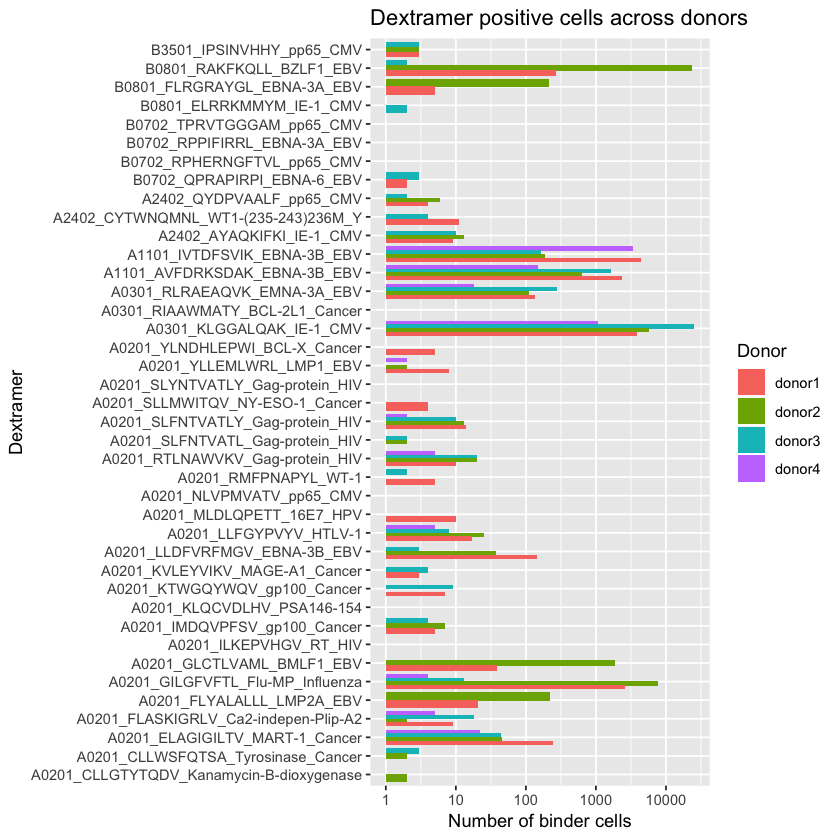

In [5]:
all_binders %>%
    filter(`binder` == 'TRUE') %>%
    group_by(`donor`, `dextramer`) %>%
    summarize(`Binders_count`=n()) %>%
    ggplot(aes(x=`dextramer`, y=`Binders_count`, fill=`donor`)) +
        geom_col(position=position_dodge(width=.8)) +
        scale_y_log10() +
        coord_flip() +
        labs(
            y='Number of binder cells',
            x='Dextramer',
            title='Dextramer positive cells across donors',
            fill='Donor'
        )

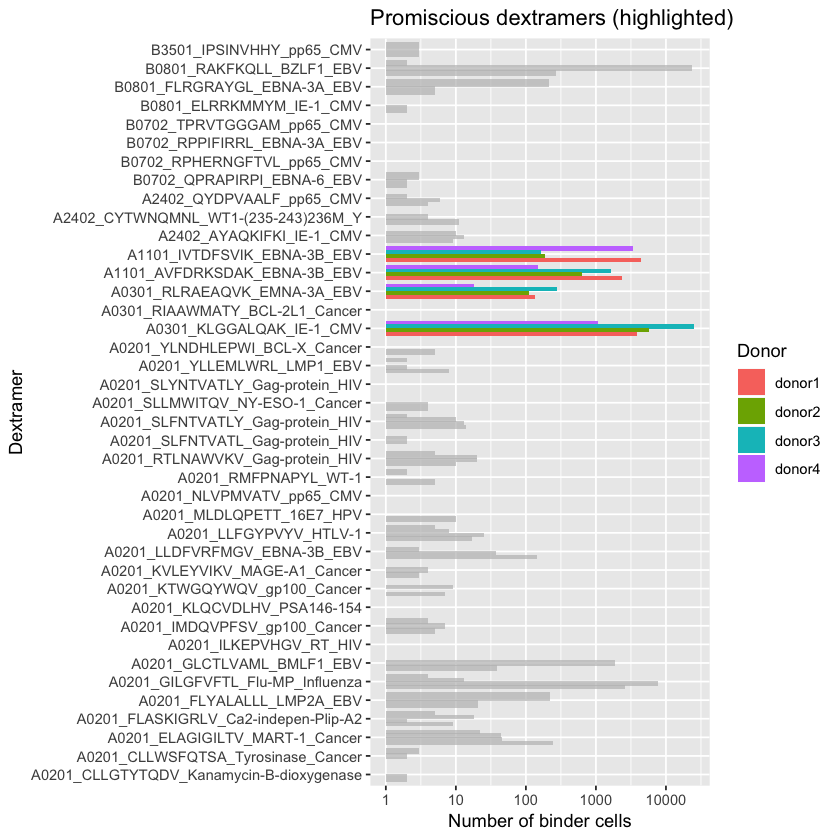

In [6]:
all_binders %>%
    filter(`binder` == 'TRUE') %>%
    group_by(`donor`, `dextramer`) %>%
    summarize(`Binders_count`=n()) %>%
    ggplot(aes(x=`dextramer`, y=`Binders_count`, fill=`donor`)) +
        geom_col(position=position_dodge(width=.8)) +
        scale_y_log10() +
        coord_flip() +
        labs(
            y='Number of binder cells',
            x='Dextramer',
            title='Promiscious dextramers (highlighted)',
            fill='Donor'
        ) +
        gghighlight(
            `dextramer` %in% c('A0301_RLRAEAQVK_EMNA-3A_EBV',
                               'A0301_KLGGALQAK_IE-1_CMV',
                               'A1101_IVTDFSVIK_EBNA-3B_EBV',
                               'A1101_AVFDRKSDAK_EBNA-3B_EBV')
        )

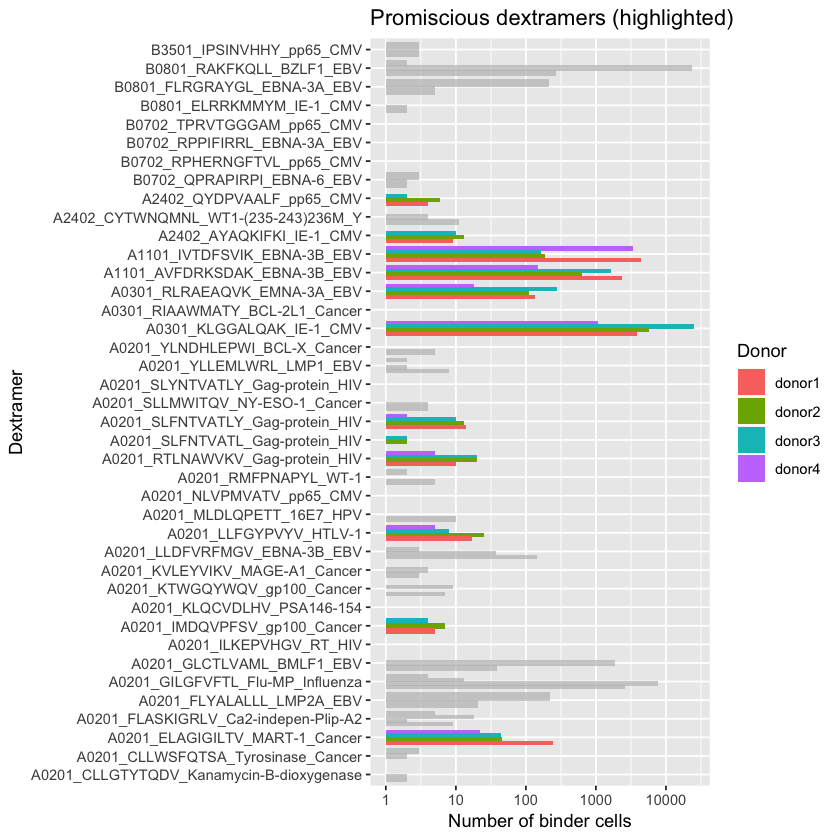

In [7]:
all_binders %>%
    filter(`binder` == 'TRUE') %>%
    group_by(`donor`, `dextramer`) %>%
    summarize(`Binders_count`=n()) %>%
    ggplot(aes(x=`dextramer`, y=`Binders_count`, fill=`donor`)) +
        geom_col(position=position_dodge(width=.8)) +
        scale_y_log10() +
        coord_flip() +
        labs(
            y='Number of binder cells',
            x='Dextramer',
            title='Promiscious dextramers (highlighted)',
            fill='Donor'
        ) +
        gghighlight(
            `dextramer` %in% c('A0301_RLRAEAQVK_EMNA-3A_EBV',
                               'A0301_KLGGALQAK_IE-1_CMV',
                               'A1101_IVTDFSVIK_EBNA-3B_EBV',
                               'A1101_AVFDRKSDAK_EBNA-3B_EBV',
                               'A0201_ELAGIGILTV_MART-1_Cancer',
                               'A0201_SLFNTVATLY_Gag-protein_HIV',
                               'A0201_SLFNTVATL_Gag-protein_HIV',
                               'A0201_RTLNAWVKV_Gag-protein_HIV',
                               'A2402_QYDPVAALF_pp65_CMV',
                               'A2402_AYAQKIFKI_IE-1_CMV',
                               'A0201_LLFGYPVYV_HTLV-1',
                               'A0201_IMDQVPFSV_gp100_Cancer'
                              )
        )

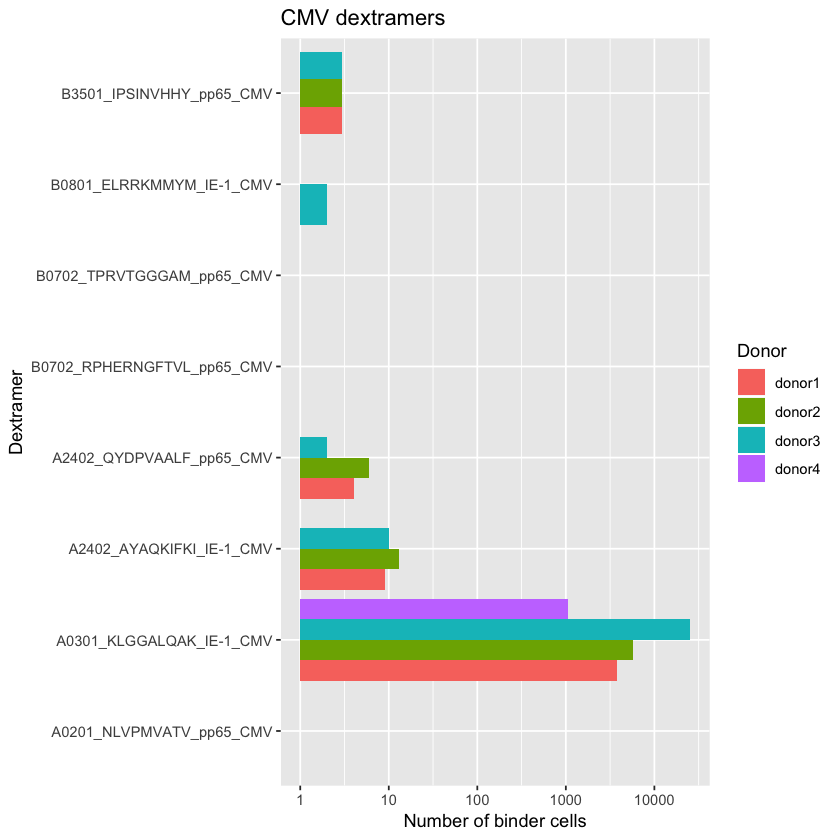

In [8]:
all_binders %>%
    filter(
        `binder` == 'TRUE',
        str_detect(`dextramer`, '_CMV')
    ) %>%
    group_by(`donor`, `dextramer`) %>%
    summarize(`Binders_count`=n()) %>%
    ggplot(aes(x=`dextramer`, y=`Binders_count`, fill=`donor`)) +
        geom_col(position=position_dodge()) +
        scale_y_log10() +
        coord_flip() +
        labs(
            y='Number of binder cells',
            x='Dextramer',
            title='CMV dextramers',
            fill='Donor'
        )

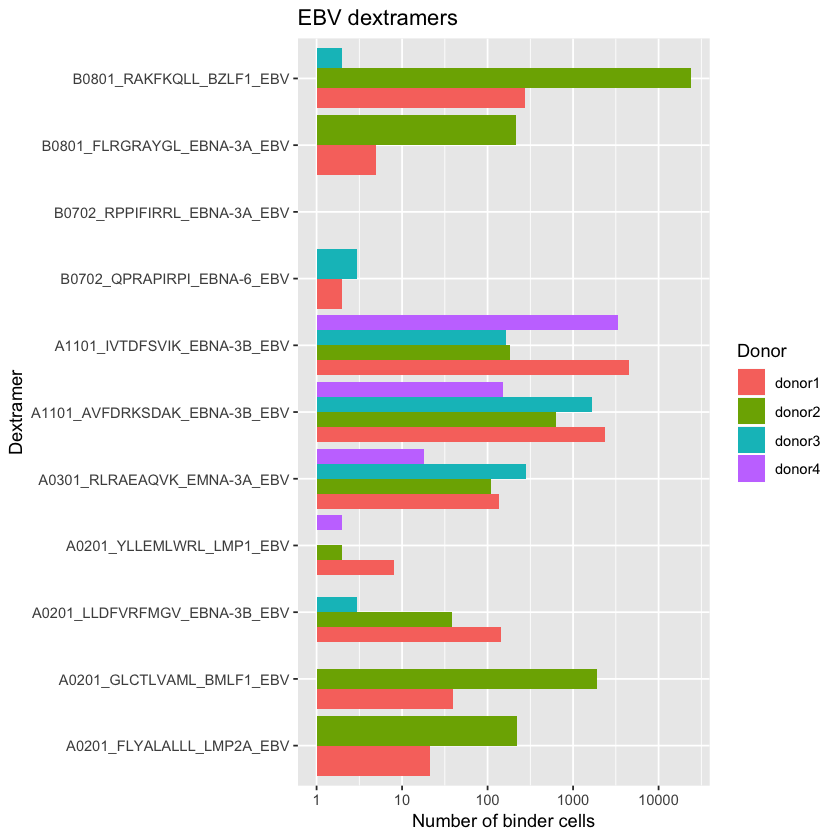

In [9]:
all_binders %>%
    filter(
        `binder` == 'TRUE',
        str_detect(`dextramer`, '_EBV')
    ) %>%
    group_by(`donor`, `dextramer`) %>%
    summarize(`Binders_count`=n()) %>%
    ggplot(aes(x=`dextramer`, y=`Binders_count`, fill=`donor`)) +
        geom_col(position=position_dodge()) +
        scale_y_log10() +
        coord_flip() +
        labs(
            y='Number of binder cells',
            x='Dextramer',
            title='EBV dextramers',
            fill='Donor'
        )

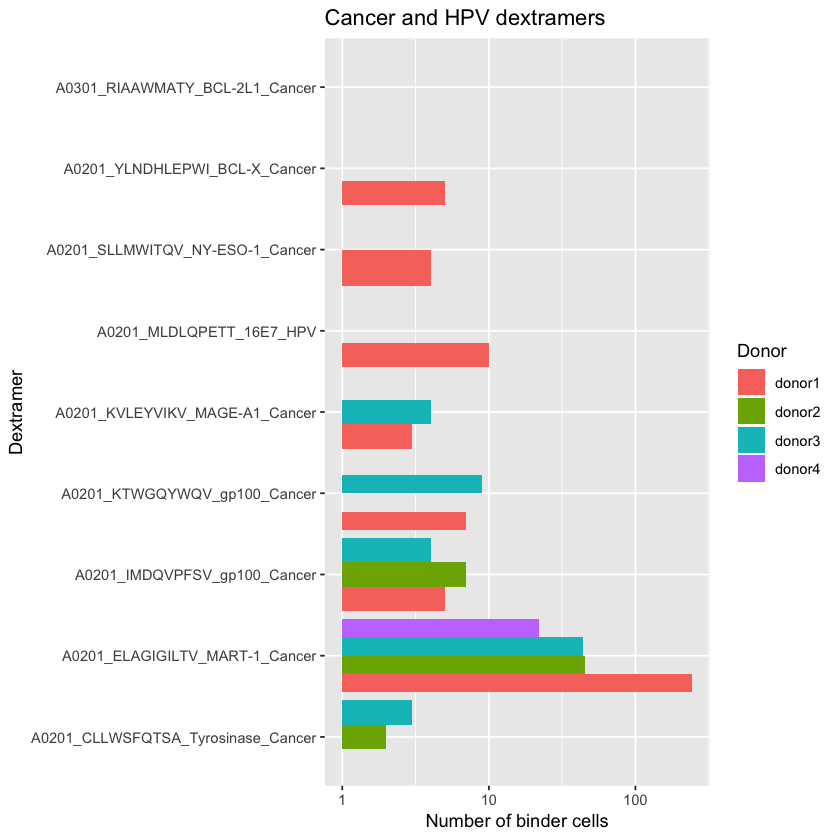

In [15]:
all_binders %>%
    filter(
        `binder` == 'TRUE',
        str_detect(`dextramer`, '_Cancer|_HPV')
    ) %>%
    group_by(`donor`, `dextramer`) %>%
    summarize(`Binders_count`=n()) %>%
    ggplot(aes(x=`dextramer`, y=`Binders_count`, fill=`donor`)) +
        geom_col(position=position_dodge()) +
        scale_y_log10() +
        coord_flip() +
        labs(
            y='Number of binder cells',
            x='Dextramer',
            title='Cancer and HPV dextramers',
            fill='Donor'
        )

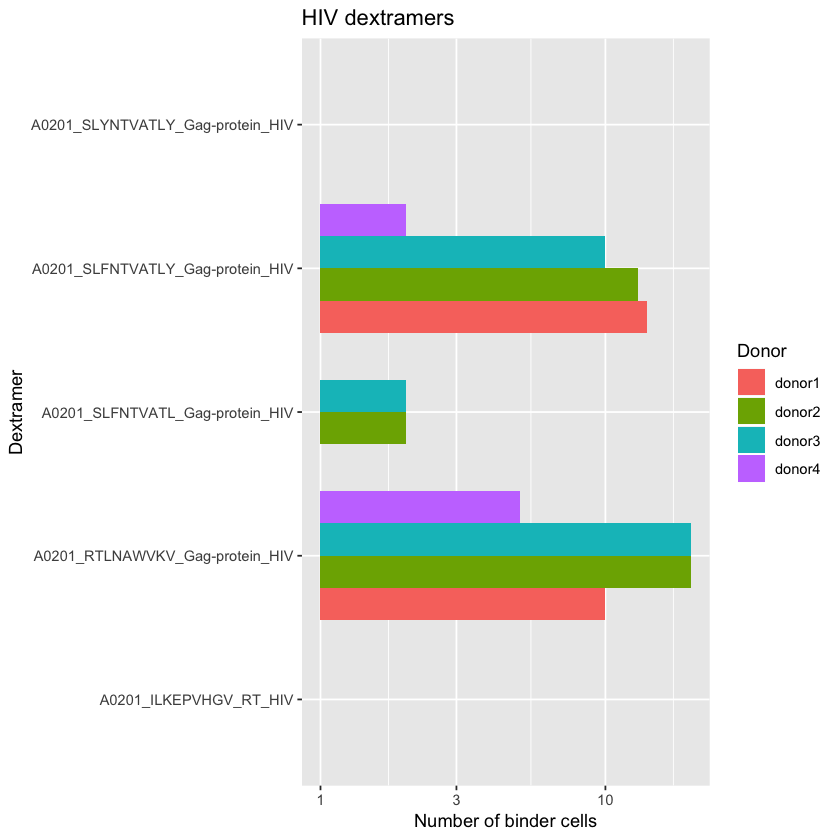

In [12]:
all_binders %>%
    filter(
        `binder` == 'TRUE',
        str_detect(`dextramer`, '_HIV')
    ) %>%
    group_by(`donor`, `dextramer`) %>%
    summarize(`Binders_count`=n()) %>%
    ggplot(aes(x=`dextramer`, y=`Binders_count`, fill=`donor`)) +
        geom_col(position=position_dodge()) +
        scale_y_log10() +
        coord_flip() +
        labs(
            y='Number of binder cells',
            x='Dextramer',
            title='HIV dextramers',
            fill='Donor'
        )